In [4]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from gensim import corpora, models
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.manifold import TSNE
import folium
import math


import youtube_dl
import re

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/reginacatipon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/reginacatipon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/reginacatipon/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reginacatipon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/reginacatipon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/reginacatipon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data collection

In [2]:
ydl_opts = {'dump_single_json': True, 'writeautomaticsub': True, 'subtitleslangs': ['en']}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    result_meme = ydl.extract_info("ytsearch100:meme WWIII", download=False)
    

# clean text, code from class
tag_re = re.compile(r'<[^>]+>')
link_re = re.compile(r'http\S+|\d+')
def remove_tags(text):
    return tag_re.sub(' ', text)

def remove_links(text):
    return link_re.sub(' ', text)


title, description, tags, captions = ([] for i in range(4))

for i in result_meme['entries']:
    # append each item to a separate list and then add them as a dictionary to dataframe all at once after the loop has run
    title.append(i['title'])
    description.append(remove_links(i['description']).replace('\n',' '))
    tags.append(remove_links(' '.join(i['tags'])))
    if 'en' in i['automatic_captions']:
        auto_captions = requests.get(i['automatic_captions']['en'][0]['url'])
        auto_captions_clean = remove_tags(auto_captions.text).replace('&amp;#39;', "'")         \
                                                             .replace('&lt;font'," ")           \
                                                             .replace('color=&quot;', " ")      \
                                                             .replace('&lt;/font&gt;', " ")     \
                                                             .replace('#CCCCCC&quot;&gt;', " ") \
                                                             .replace('#E5E5E5&quot;&gt;', " ")
        captions.append(auto_captions_clean)
    else:
        captions.append(float('nan'))
        

[youtube:search] query "meme WWIII": Downloading page 1
[youtube:search] query "meme WWIII": Downloading page 2
[youtube:search] query "meme WWIII": Downloading page 3
[youtube:search] query "meme WWIII": Downloading page 4
[youtube:search] query "meme WWIII": Downloading page 5
[download] Downloading playlist: meme WWIII
[youtube:search] playlist meme WWIII: Collected 100 video ids (downloading 100 of them)
[download] Downloading video 1 of 100
[youtube] m_gTNpJ21OY: Downloading webpage
[youtube] m_gTNpJ21OY: Downloading video info webpage
[youtube] m_gTNpJ21OY: Looking for automatic captions
[download] Downloading video 2 of 100
[youtube] O5L3H0AhwdA: Downloading webpage
[youtube] O5L3H0AhwdA: Downloading video info webpage
[youtube] O5L3H0AhwdA: Looking for automatic captions
[download] Downloading video 3 of 100
[youtube] pCc1sOwFc6k: Downloading webpage
[youtube] pCc1sOwFc6k: Downloading video info webpage
[youtube] pCc1sOwFc6k: Looking for automatic captions
[download] Downloadin

[download] Downloading video 6 of 100
[youtube] PwQ5hsS-NYQ: Downloading webpage
[youtube] PwQ5hsS-NYQ: Downloading video info webpage
[youtube] PwQ5hsS-NYQ: Looking for automatic captions
[download] Downloading video 7 of 100
[youtube] 8S6M9Xlzu4A: Downloading webpage
[youtube] 8S6M9Xlzu4A: Downloading video info webpage
[youtube] 8S6M9Xlzu4A: Looking for automatic captions


[download] Downloading video 8 of 100
[youtube] PIzv0TAL2XA: Downloading webpage
[youtube] PIzv0TAL2XA: Downloading video info webpage
[youtube] PIzv0TAL2XA: Looking for automatic captions


[download] Downloading video 9 of 100
[youtube] xQaySnBRyp0: Downloading webpage
[youtube] xQaySnBRyp0: Downloading video info webpage
[youtube] xQaySnBRyp0: Looking for automatic captions
[download] Downloading video 10 of 100
[youtube] Pz8i-NSC1ak: Downloading webpage
[youtube] Pz8i-NSC1ak: Downloading video info webpage
[youtube] Pz8i-NSC1ak: Looking for automatic captions
[download] Downloading video 11 of 100
[youtube] GeoVy9s4y5g: Downloading webpage
[youtube] GeoVy9s4y5g: Downloading video info webpage
[youtube] GeoVy9s4y5g: Looking for automatic captions
[download] Downloading video 12 of 100
[youtube] uXjiZHC6Jqc: Downloading webpage
[youtube] uXjiZHC6Jqc: Downloading video info webpage
[youtube] uXjiZHC6Jqc: Looking for automatic captions


[download] Downloading video 13 of 100
[youtube] 5WF0D4piAsA: Downloading webpage
[youtube] 5WF0D4piAsA: Downloading video info webpage
[youtube] 5WF0D4piAsA: Looking for automatic captions
[download] Downloading video 14 of 100
[youtube] 4jlDCS-z7TI: Downloading webpage
[youtube] 4jlDCS-z7TI: Downloading video info webpage
[youtube] 4jlDCS-z7TI: Looking for automatic captions
[download] Downloading video 15 of 100
[youtube] zyvAewHbt44: Downloading webpage
[youtube] zyvAewHbt44: Downloading video info webpage
[youtube] zyvAewHbt44: Looking for automatic captions
[download] Downloading video 16 of 100
[youtube] ZRQzybTsMOg: Downloading webpage
[youtube] ZRQzybTsMOg: Downloading video info webpage
[youtube] ZRQzybTsMOg: Looking for automatic captions


[download] Downloading video 17 of 100
[youtube] pTkT494YG1Q: Downloading webpage
[youtube] pTkT494YG1Q: Downloading video info webpage
[youtube] pTkT494YG1Q: Looking for automatic captions
[download] Downloading video 18 of 100
[youtube] lFnkJ5K7ZvY: Downloading webpage
[youtube] lFnkJ5K7ZvY: Downloading video info webpage
[youtube] lFnkJ5K7ZvY: Looking for automatic captions
[download] Downloading video 19 of 100
[youtube] 3NFXti7BmIk: Downloading webpage
[youtube] 3NFXti7BmIk: Downloading video info webpage
[youtube] 3NFXti7BmIk: Looking for automatic captions


[download] Downloading video 20 of 100
[youtube] ydvWGU-UOP4: Downloading webpage
[youtube] ydvWGU-UOP4: Downloading video info webpage
[youtube] ydvWGU-UOP4: Looking for automatic captions


[download] Downloading video 21 of 100
[youtube] 4i3uBpuXc5E: Downloading webpage
[youtube] 4i3uBpuXc5E: Downloading video info webpage
[youtube] 4i3uBpuXc5E: Looking for automatic captions
[download] Downloading video 22 of 100
[youtube] MCzSD2AjHec: Downloading webpage
[youtube] MCzSD2AjHec: Downloading video info webpage
[youtube] MCzSD2AjHec: Looking for automatic captions
[download] Downloading video 23 of 100
[youtube] 2rLD4tSjZAI: Downloading webpage
[youtube] 2rLD4tSjZAI: Downloading video info webpage
[youtube] 2rLD4tSjZAI: Looking for automatic captions


[youtube] 2rLD4tSjZAI: Downloading MPD manifest
[download] Downloading video 24 of 100
[youtube] 0RTo9rOXWEo: Downloading webpage
[youtube] 0RTo9rOXWEo: Downloading video info webpage
[youtube] 0RTo9rOXWEo: Looking for automatic captions


[download] Downloading video 25 of 100
[youtube] qcuaKjchYIw: Downloading webpage
[youtube] qcuaKjchYIw: Downloading video info webpage
[youtube] qcuaKjchYIw: Looking for automatic captions
[download] Downloading video 26 of 100
[youtube] yEWyUPeVGEE: Downloading webpage
[youtube] yEWyUPeVGEE: Downloading video info webpage
[youtube] yEWyUPeVGEE: Looking for automatic captions


[download] Downloading video 27 of 100
[youtube] yIIdDjtwYRU: Downloading webpage
[youtube] yIIdDjtwYRU: Downloading video info webpage
[youtube] yIIdDjtwYRU: Looking for automatic captions
[download] Downloading video 28 of 100
[youtube] ZPbG7dqz8RU: Downloading webpage
[youtube] ZPbG7dqz8RU: Downloading video info webpage
[youtube] ZPbG7dqz8RU: Looking for automatic captions
[download] Downloading video 29 of 100
[youtube] c-xqV4J46K4: Downloading webpage
[youtube] c-xqV4J46K4: Downloading video info webpage
[youtube] c-xqV4J46K4: Looking for automatic captions
[download] Downloading video 30 of 100
[youtube] f16iE4Mdno0: Downloading webpage
[youtube] f16iE4Mdno0: Downloading video info webpage
[youtube] f16iE4Mdno0: Looking for automatic captions
[download] Downloading video 31 of 100
[youtube] uboBGA06DFM: Downloading webpage
[youtube] uboBGA06DFM: Downloading video info webpage
[youtube] uboBGA06DFM: Looking for automatic captions
[download] Downloading video 32 of 100
[youtube] O

[download] Downloading video 33 of 100
[youtube] fINm-N81aC8: Downloading webpage
[youtube] fINm-N81aC8: Downloading video info webpage
[youtube] fINm-N81aC8: Looking for automatic captions


[download] Downloading video 34 of 100
[youtube] idgJXilaQrs: Downloading webpage
[youtube] idgJXilaQrs: Downloading video info webpage
[youtube] idgJXilaQrs: Looking for automatic captions


[download] Downloading video 35 of 100
[youtube] BMn3JuTGMKQ: Downloading webpage
[youtube] BMn3JuTGMKQ: Downloading video info webpage
[youtube] BMn3JuTGMKQ: Looking for automatic captions


[download] Downloading video 36 of 100
[youtube] vwt9CjJTwp0: Downloading webpage
[youtube] vwt9CjJTwp0: Downloading video info webpage
[youtube] vwt9CjJTwp0: Looking for automatic captions
[download] Downloading video 37 of 100
[youtube] II2-QevpYp0: Downloading webpage
[youtube] II2-QevpYp0: Downloading video info webpage
[youtube] II2-QevpYp0: Looking for automatic captions


[download] Downloading video 38 of 100
[youtube] dW26PNTPUKQ: Downloading webpage
[youtube] dW26PNTPUKQ: Downloading video info webpage
[youtube] dW26PNTPUKQ: Looking for automatic captions
[download] Downloading video 39 of 100
[youtube] A3b4xJVUBvU: Downloading webpage
[youtube] A3b4xJVUBvU: Downloading video info webpage
[youtube] A3b4xJVUBvU: Looking for automatic captions


[download] Downloading video 40 of 100
[youtube] raqWKqRIaBs: Downloading webpage
[youtube] raqWKqRIaBs: Downloading video info webpage
[youtube] raqWKqRIaBs: Looking for automatic captions
[download] Downloading video 41 of 100
[youtube] Ck7836DivCA: Downloading webpage
[youtube] Ck7836DivCA: Downloading video info webpage
[youtube] Ck7836DivCA: Looking for automatic captions


[download] Downloading video 42 of 100
[youtube] 4jlDCS-z7TI: Downloading webpage
[youtube] 4jlDCS-z7TI: Downloading video info webpage
[youtube] 4jlDCS-z7TI: Looking for automatic captions
[download] Downloading video 43 of 100
[youtube] mWa-r29PZBc: Downloading webpage
[youtube] mWa-r29PZBc: Downloading video info webpage
[youtube] mWa-r29PZBc: Looking for automatic captions
[youtube] mWa-r29PZBc: Downloading MPD manifest
[download] Downloading video 44 of 100
[youtube] ht84Jt0iI4I: Downloading webpage
[youtube] ht84Jt0iI4I: Downloading video info webpage
[youtube] ht84Jt0iI4I: Looking for automatic captions
[download] Downloading video 45 of 100
[youtube] Etmq4aWyzyY: Downloading webpage
[youtube] Etmq4aWyzyY: Downloading video info webpage
[youtube] Etmq4aWyzyY: Looking for automatic captions


[download] Downloading video 46 of 100
[youtube] WBWYXR5Q0kE: Downloading webpage
[youtube] WBWYXR5Q0kE: Downloading video info webpage
[youtube] WBWYXR5Q0kE: Looking for automatic captions
[download] Downloading video 47 of 100
[youtube] rvIsf4fxfic: Downloading webpage
[youtube] rvIsf4fxfic: Downloading video info webpage
[youtube] rvIsf4fxfic: Looking for automatic captions


[download] Downloading video 48 of 100
[youtube] jMe86IqSGu0: Downloading webpage
[youtube] jMe86IqSGu0: Downloading video info webpage
[youtube] jMe86IqSGu0: Looking for automatic captions
[download] Downloading video 49 of 100
[youtube] ay7m_CLwOGo: Downloading webpage
[youtube] ay7m_CLwOGo: Downloading video info webpage
[youtube] ay7m_CLwOGo: Looking for automatic captions


[youtube] ay7m_CLwOGo: Downloading MPD manifest
[download] Downloading video 50 of 100
[youtube] c52mU_GQlRE: Downloading webpage
[youtube] c52mU_GQlRE: Downloading video info webpage
[youtube] c52mU_GQlRE: Looking for automatic captions


[download] Downloading video 51 of 100
[youtube] _G4OJlOEfz8: Downloading webpage
[youtube] _G4OJlOEfz8: Downloading video info webpage
[youtube] _G4OJlOEfz8: Looking for automatic captions


[download] Downloading video 52 of 100
[youtube] SB4bW6Cw48c: Downloading webpage
[youtube] SB4bW6Cw48c: Downloading video info webpage
[youtube] SB4bW6Cw48c: Looking for automatic captions
[download] Downloading video 53 of 100
[youtube] 30CbipuhIl4: Downloading webpage
[youtube] 30CbipuhIl4: Downloading video info webpage
[youtube] 30CbipuhIl4: Looking for automatic captions


[youtube] 30CbipuhIl4: Downloading MPD manifest
[download] Downloading video 54 of 100
[youtube] W_8BYoYZsvU: Downloading webpage
[youtube] W_8BYoYZsvU: Downloading video info webpage
[youtube] W_8BYoYZsvU: Looking for automatic captions
[download] Downloading video 55 of 100
[youtube] TWc2Z3TDzn8: Downloading webpage
[youtube] TWc2Z3TDzn8: Downloading video info webpage
[youtube] TWc2Z3TDzn8: Looking for automatic captions
[download] Downloading video 56 of 100
[youtube] Gd_gx5xnkPU: Downloading webpage
[youtube] Gd_gx5xnkPU: Downloading video info webpage
[youtube] Gd_gx5xnkPU: Looking for automatic captions


[download] Downloading video 57 of 100
[youtube] YuqiMFnTNUo: Downloading webpage
[youtube] YuqiMFnTNUo: Downloading video info webpage
[youtube] YuqiMFnTNUo: Looking for automatic captions
[download] Downloading video 58 of 100
[youtube] 5WF0D4piAsA: Downloading webpage
[youtube] 5WF0D4piAsA: Downloading video info webpage
[youtube] 5WF0D4piAsA: Looking for automatic captions
[download] Downloading video 59 of 100
[youtube] ZRQzybTsMOg: Downloading webpage
[youtube] ZRQzybTsMOg: Downloading video info webpage
[youtube] ZRQzybTsMOg: Looking for automatic captions


[download] Downloading video 60 of 100
[youtube] mH5YyaLaoNs: Downloading webpage
[youtube] mH5YyaLaoNs: Downloading video info webpage
[youtube] mH5YyaLaoNs: Looking for automatic captions


[download] Downloading video 61 of 100
[youtube] Zr0FE0Pmlzg: Downloading webpage
[youtube] Zr0FE0Pmlzg: Downloading video info webpage
[youtube] Zr0FE0Pmlzg: Looking for automatic captions


[download] Downloading video 62 of 100
[youtube] 1QMzxTlfl3U: Downloading webpage
[youtube] 1QMzxTlfl3U: Downloading video info webpage
[youtube] 1QMzxTlfl3U: Looking for automatic captions


[download] Downloading video 63 of 100
[youtube] 7KKoHmZ7TBE: Downloading webpage
[youtube] 7KKoHmZ7TBE: Downloading video info webpage
[youtube] 7KKoHmZ7TBE: Looking for automatic captions
[download] Downloading video 64 of 100
[youtube] fUR4YydH9jA: Downloading webpage
[youtube] fUR4YydH9jA: Downloading video info webpage
[youtube] fUR4YydH9jA: Looking for automatic captions
[download] Downloading video 65 of 100
[youtube] cMvRzVjW4iQ: Downloading webpage
[youtube] cMvRzVjW4iQ: Downloading video info webpage
[youtube] cMvRzVjW4iQ: Looking for automatic captions


[download] Downloading video 66 of 100
[youtube] Otq6zu3EDEs: Downloading webpage
[youtube] Otq6zu3EDEs: Downloading video info webpage
[youtube] Otq6zu3EDEs: Looking for automatic captions
[download] Downloading video 67 of 100
[youtube] MvmY_sjqOmw: Downloading webpage
[youtube] MvmY_sjqOmw: Downloading video info webpage
[youtube] MvmY_sjqOmw: Looking for automatic captions


[download] Downloading video 68 of 100
[youtube] ytu2lhsKbic: Downloading webpage
[youtube] ytu2lhsKbic: Downloading video info webpage
[youtube] ytu2lhsKbic: Looking for automatic captions


[download] Downloading video 69 of 100
[youtube] U1_IhtxsYDs: Downloading webpage
[youtube] U1_IhtxsYDs: Downloading video info webpage
[youtube] U1_IhtxsYDs: Looking for automatic captions
[download] Downloading video 70 of 100
[youtube] uAG9YdMvU1k: Downloading webpage
[youtube] uAG9YdMvU1k: Downloading video info webpage
[youtube] uAG9YdMvU1k: Looking for automatic captions
[download] Downloading video 71 of 100
[youtube] B_Mxp5kgtWQ: Downloading webpage
[youtube] B_Mxp5kgtWQ: Downloading video info webpage
[youtube] B_Mxp5kgtWQ: Looking for automatic captions


[download] Downloading video 72 of 100
[youtube] 2DfILq_DOYs: Downloading webpage
[youtube] 2DfILq_DOYs: Downloading video info webpage
[youtube] 2DfILq_DOYs: Looking for automatic captions


[download] Downloading video 73 of 100
[youtube] gantZBqXnQ4: Downloading webpage
[youtube] gantZBqXnQ4: Downloading video info webpage
[youtube] gantZBqXnQ4: Looking for automatic captions
[download] Downloading video 74 of 100
[youtube] oxhJ7odDBi0: Downloading webpage
[youtube] oxhJ7odDBi0: Downloading video info webpage
[youtube] oxhJ7odDBi0: Looking for automatic captions


[download] Downloading video 75 of 100
[youtube] D2eNcgnjeuY: Downloading webpage
[youtube] D2eNcgnjeuY: Downloading video info webpage
[youtube] D2eNcgnjeuY: Looking for automatic captions
[download] Downloading video 76 of 100
[youtube] nkNEjLXsMMk: Downloading webpage
[youtube] nkNEjLXsMMk: Downloading video info webpage
[youtube] nkNEjLXsMMk: Looking for automatic captions


[download] Downloading video 77 of 100
[youtube] Wo1M8E7Y_9g: Downloading webpage
[youtube] Wo1M8E7Y_9g: Downloading video info webpage
[youtube] Wo1M8E7Y_9g: Looking for automatic captions
[download] Downloading video 78 of 100
[youtube] gpNiq69nug0: Downloading webpage
[youtube] gpNiq69nug0: Downloading video info webpage
[youtube] gpNiq69nug0: Looking for automatic captions


[youtube] gpNiq69nug0: Downloading MPD manifest
[download] Downloading video 79 of 100
[youtube] Akm_a3sI6fM: Downloading webpage
[youtube] Akm_a3sI6fM: Downloading video info webpage
[youtube] Akm_a3sI6fM: Looking for automatic captions


[download] Downloading video 80 of 100
[youtube] C2a6XuZLS7s: Downloading webpage
[youtube] C2a6XuZLS7s: Downloading video info webpage
[youtube] C2a6XuZLS7s: Looking for automatic captions
[download] Downloading video 81 of 100
[youtube] zHc9ooyulwQ: Downloading webpage
[youtube] zHc9ooyulwQ: Downloading video info webpage
[youtube] zHc9ooyulwQ: Looking for automatic captions
[download] Downloading video 82 of 100
[youtube] GYJX6o0DPUQ: Downloading webpage
[youtube] GYJX6o0DPUQ: Downloading video info webpage
[youtube] GYJX6o0DPUQ: Looking for automatic captions
[download] Downloading video 83 of 100
[youtube] _YJg-Wg1YfQ: Downloading webpage
[youtube] _YJg-Wg1YfQ: Downloading video info webpage
[youtube] _YJg-Wg1YfQ: Looking for automatic captions


[download] Downloading video 84 of 100
[youtube] Lojn9rJa9m8: Downloading webpage
[youtube] Lojn9rJa9m8: Downloading video info webpage
[youtube] Lojn9rJa9m8: Looking for automatic captions
[download] Downloading video 85 of 100
[youtube] Nk7P_oiYpGw: Downloading webpage
[youtube] Nk7P_oiYpGw: Downloading video info webpage
[youtube] Nk7P_oiYpGw: Looking for automatic captions


[download] Downloading video 86 of 100
[youtube] LVkDzjk-ro0: Downloading webpage
[youtube] LVkDzjk-ro0: Downloading video info webpage
[youtube] LVkDzjk-ro0: Looking for automatic captions


[youtube] LVkDzjk-ro0: Downloading MPD manifest
[download] Downloading video 87 of 100
[youtube] Jib0wx-STaE: Downloading webpage
[youtube] Jib0wx-STaE: Downloading video info webpage
[youtube] Jib0wx-STaE: Looking for automatic captions


[download] Downloading video 88 of 100
[youtube] UpsnbMu0x7k: Downloading webpage
[youtube] UpsnbMu0x7k: Downloading video info webpage
[youtube] UpsnbMu0x7k: Looking for automatic captions
[download] Downloading video 89 of 100
[youtube] 9X1k96DK-ng: Downloading webpage
[youtube] 9X1k96DK-ng: Downloading video info webpage
[youtube] 9X1k96DK-ng: Looking for automatic captions
[download] Downloading video 90 of 100
[youtube] XcticGCZ7bA: Downloading webpage
[youtube] XcticGCZ7bA: Downloading video info webpage
[youtube] XcticGCZ7bA: Looking for automatic captions


[youtube] XcticGCZ7bA: Downloading MPD manifest
[download] Downloading video 91 of 100
[youtube] XcticGCZ7bA: Downloading webpage
[youtube] XcticGCZ7bA: Downloading video info webpage
[youtube] XcticGCZ7bA: Looking for automatic captions


[youtube] XcticGCZ7bA: Downloading MPD manifest
[download] Downloading video 92 of 100
[youtube] 9X1k96DK-ng: Downloading webpage
[youtube] 9X1k96DK-ng: Downloading video info webpage
[youtube] 9X1k96DK-ng: Looking for automatic captions
[download] Downloading video 93 of 100
[youtube] dxtop5wnor4: Downloading webpage
[youtube] dxtop5wnor4: Downloading video info webpage
[youtube] dxtop5wnor4: Looking for automatic captions
[youtube] dxtop5wnor4: Downloading MPD manifest
[download] Downloading video 94 of 100
[youtube] jSWlbi6vh4w: Downloading webpage
[youtube] jSWlbi6vh4w: Downloading video info webpage
[youtube] jSWlbi6vh4w: Looking for automatic captions


[download] Downloading video 95 of 100
[youtube] wtPAAg5SqNI: Downloading webpage
[youtube] wtPAAg5SqNI: Downloading video info webpage
[youtube] wtPAAg5SqNI: Looking for automatic captions


[youtube] wtPAAg5SqNI: Downloading MPD manifest
[download] Downloading video 96 of 100
[youtube] -xQF9619w64: Downloading webpage
[youtube] -xQF9619w64: Downloading video info webpage
[youtube] -xQF9619w64: Looking for automatic captions
[youtube] -xQF9619w64: Downloading MPD manifest
[download] Downloading video 97 of 100
[youtube] gFYsOt364m8: Downloading webpage
[youtube] gFYsOt364m8: Downloading video info webpage
[youtube] gFYsOt364m8: Looking for automatic captions
[download] Downloading video 98 of 100
[youtube] UaMiGLS3aWw: Downloading webpage
[youtube] UaMiGLS3aWw: Downloading video info webpage
[youtube] UaMiGLS3aWw: Looking for automatic captions
[download] Downloading video 99 of 100
[youtube] 26opPOvlZ9E: Downloading webpage
[youtube] 26opPOvlZ9E: Downloading video info webpage
[youtube] 26opPOvlZ9E: Downloading js player vfl9QKcqT
[youtube] 26opPOvlZ9E: Downloading js player vfl9QKcqT
[youtube] 26opPOvlZ9E: Looking for automatic captions


[download] Downloading video 100 of 100
[youtube] FwDl3ix0xSo: Downloading webpage
[youtube] FwDl3ix0xSo: Downloading video info webpage
[youtube] FwDl3ix0xSo: Looking for automatic captions
[youtube] FwDl3ix0xSo: Downloading MPD manifest
[download] Finished downloading playlist: meme WWIII


In [3]:
# create dataframe and preview       
wwiii_meme_df = pd.DataFrame({'Title': title, 'Description': description, 'Tags': tags, 'Captions': captions})

wwiii_meme_df.head()


Title  \
0                                WW3 MEMES   
1                              WWIII Memes   
2  MEMES that give me WWIII Hallucinations   
3             World War 3 MEME COMPILATION   
4            MEMES that caused World War 3   

                                         Description  \
0  you laugh you get drafted into ww   ➤ New Merc...   
1  The first meme of    Towering thanks to my pat...   
2  ---- 🔥 LED MAGNETIC CHARGER 🔥 ---- Get yours f...   
3  DANK MEME MERCH :   Use code meme for an Extra...   
4  ----  NITEBUX GAMING GLASSES  ---- Get yours f...   

                                                Tags  \
0  lifeples meme compilation funny video ww  ww  ...   
1                                                      
2  meme memes tik tok tiktok vine vines dank meme...   
3  thememesheep memesheep ww  world war   world w...   
4  memes meme dank memes wet memes fortnite memes...   

                                            Captions  
0     I'm in Iran I mean where the fuck should  y...  
1     is this how we really started off the  new ...  
2     let's play rainshadow legends star now  for...  
3     [Music]  [Music]  see that wasn't so hard t...  
4                                                NaN

In [4]:
#wwiii_meme_df.to_csv('03-02-20_meme')
#wwiii_meme_df.to_csv('03-03-20_meme')
#wwiii_meme_df.to_csv('03-04-20_meme')
#wwiii_meme_df.to_csv('03-05-20_meme')
#wwiii_meme_df.to_csv('03-06-20_meme')
#wwiii_meme_df.to_csv('03-07-20_meme')
#wwiii_meme_df.to_csv('03-08-20_meme')

In [5]:
wwiii_meme_df.to_csv('03-09-20_meme')

In [6]:
ydl_opts = {'dump_single_json': True, 'writeautomaticsub': True, 'subtitleslangs': ['en']}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    result_meme = ydl.extract_info("ytsearch100:NATO WWIII", download=False)
    

# clean text, code from class
tag_re = re.compile(r'<[^>]+>')
link_re = re.compile(r'http\S+|\d+')
def remove_tags(text):
    return tag_re.sub(' ', text)

def remove_links(text):
    return link_re.sub(' ', text)


title, description, tags, captions = ([] for i in range(4))

for i in result_meme['entries']:
    # append each item to a separate list and then add them as a dictionary to dataframe all at once after the loop has run
    title.append(i['title'])
    description.append(remove_links(i['description']).replace('\n',' '))
    tags.append(remove_links(' '.join(i['tags'])))
    if 'en' in i['automatic_captions']:
        auto_captions = requests.get(i['automatic_captions']['en'][0]['url'])
        auto_captions_clean = remove_tags(auto_captions.text).replace('&amp;#39;', "'")         \
                                                             .replace('&lt;font'," ")           \
                                                             .replace('color=&quot;', " ")      \
                                                             .replace('&lt;/font&gt;', " ")     \
                                                             .replace('#CCCCCC&quot;&gt;', " ") \
                                                             .replace('#E5E5E5&quot;&gt;', " ")
        captions.append(auto_captions_clean)
    else:
        captions.append(float('nan'))
        

[youtube:search] query "NATO WWIII": Downloading page 1
[youtube:search] query "NATO WWIII": Downloading page 2
[youtube:search] query "NATO WWIII": Downloading page 3
[youtube:search] query "NATO WWIII": Downloading page 4
[youtube:search] query "NATO WWIII": Downloading page 5
[download] Downloading playlist: NATO WWIII
[youtube:search] playlist NATO WWIII: Collected 100 video ids (downloading 100 of them)
[download] Downloading video 1 of 100
[youtube] kONMKmWQyE8: Downloading webpage
[youtube] kONMKmWQyE8: Downloading video info webpage
[youtube] kONMKmWQyE8: Looking for automatic captions
[download] Downloading video 2 of 100
[youtube] NW9vZoAEESU: Downloading webpage
[youtube] NW9vZoAEESU: Downloading video info webpage
[youtube] NW9vZoAEESU: Looking for automatic captions


[download] Downloading video 3 of 100
[youtube] lBLGhV1lbVU: Downloading webpage
[youtube] lBLGhV1lbVU: Downloading video info webpage
[youtube] lBLGhV1lbVU: Looking for automatic captions
[download] Downloading video 4 of 100
[youtube] 3hbcEvKXnPo: Downloading webpage
[youtube] 3hbcEvKXnPo: Downloading video info webpage
[youtube] 3hbcEvKXnPo: Looking for automatic captions
[download] Downloading video 5 of 100
[youtube] tvMm4Uh3HPs: Downloading webpage
[youtube] tvMm4Uh3HPs: Downloading video info webpage
[youtube] tvMm4Uh3HPs: Looking for automatic captions
[download] Downloading video 6 of 100
[youtube] YlG1ZIjnyUk: Downloading webpage
[youtube] YlG1ZIjnyUk: Downloading video info webpage
[youtube] YlG1ZIjnyUk: Looking for automatic captions


[download] Downloading video 7 of 100
[youtube] 2xjKvK4a1A8: Downloading webpage
[youtube] 2xjKvK4a1A8: Downloading video info webpage
[youtube] 2xjKvK4a1A8: Looking for automatic captions


[youtube] 2xjKvK4a1A8: Downloading MPD manifest
[download] Downloading video 8 of 100
[youtube] h67m3FIjaQ0: Downloading webpage
[youtube] h67m3FIjaQ0: Downloading video info webpage
[youtube] h67m3FIjaQ0: Looking for automatic captions
[download] Downloading video 9 of 100
[youtube] Wr-DNBVJwLU: Downloading webpage
[youtube] Wr-DNBVJwLU: Downloading video info webpage
[youtube] Wr-DNBVJwLU: Looking for automatic captions
[download] Downloading video 10 of 100
[youtube] -FhCi7qQPbk: Downloading webpage
[youtube] -FhCi7qQPbk: Downloading video info webpage
[youtube] -FhCi7qQPbk: Looking for automatic captions
[download] Downloading video 11 of 100
[youtube] 2wHgMb9yAmY: Downloading webpage
[youtube] 2wHgMb9yAmY: Downloading video info webpage
[youtube] 2wHgMb9yAmY: Looking for automatic captions


[download] Downloading video 12 of 100
[youtube] k2aGm_oHKh8: Downloading webpage
[youtube] k2aGm_oHKh8: Downloading video info webpage
[youtube] k2aGm_oHKh8: Looking for automatic captions


[download] Downloading video 13 of 100
[youtube] GDUaB3ZR7ok: Downloading webpage
[youtube] GDUaB3ZR7ok: Downloading video info webpage
[youtube] GDUaB3ZR7ok: Looking for automatic captions


[download] Downloading video 14 of 100
[youtube] BT7j6xU-Fjo: Downloading webpage
[youtube] BT7j6xU-Fjo: Downloading video info webpage
[youtube] BT7j6xU-Fjo: Looking for automatic captions
[download] Downloading video 15 of 100
[youtube] 4bM_-9RI2M0: Downloading webpage
[youtube] 4bM_-9RI2M0: Downloading video info webpage
[youtube] 4bM_-9RI2M0: Looking for automatic captions
[download] Downloading video 16 of 100
[youtube] z4lCfEW5gwk: Downloading webpage
[youtube] z4lCfEW5gwk: Downloading video info webpage
[youtube] z4lCfEW5gwk: Looking for automatic captions


[download] Downloading video 17 of 100
[youtube] wTsiibNiPGg: Downloading webpage
[youtube] wTsiibNiPGg: Downloading video info webpage
[youtube] wTsiibNiPGg: Looking for automatic captions


[download] Downloading video 18 of 100
[youtube] mGKqMi6ZatQ: Downloading webpage
[youtube] mGKqMi6ZatQ: Downloading video info webpage
[youtube] mGKqMi6ZatQ: Looking for automatic captions


[download] Downloading video 19 of 100
[youtube] AymvSB52Q1Y: Downloading webpage
[youtube] AymvSB52Q1Y: Downloading video info webpage
[youtube] AymvSB52Q1Y: Looking for automatic captions


[download] Downloading video 20 of 100
[youtube] nruFGq0mEno: Downloading webpage
[youtube] nruFGq0mEno: Downloading video info webpage
[youtube] nruFGq0mEno: Looking for automatic captions
[download] Downloading video 21 of 100
[youtube] crKNUMm6v90: Downloading webpage
[youtube] crKNUMm6v90: Downloading video info webpage
[youtube] crKNUMm6v90: Looking for automatic captions


[download] Downloading video 22 of 100
[youtube] _fg5amio4jU: Downloading webpage
[youtube] _fg5amio4jU: Downloading video info webpage
[youtube] _fg5amio4jU: Looking for automatic captions
[download] Downloading video 23 of 100
[youtube] q1m7opOGSmQ: Downloading webpage
[youtube] q1m7opOGSmQ: Downloading video info webpage
[youtube] q1m7opOGSmQ: Looking for automatic captions
[download] Downloading video 24 of 100
[youtube] EeYVt4R2rCg: Downloading webpage
[youtube] EeYVt4R2rCg: Downloading video info webpage
[youtube] EeYVt4R2rCg: Looking for automatic captions
[download] Downloading video 25 of 100
[youtube] M0D3A5dnAqg: Downloading webpage
[youtube] M0D3A5dnAqg: Downloading video info webpage
[youtube] M0D3A5dnAqg: Looking for automatic captions
[download] Downloading video 26 of 100
[youtube] iy2GoQjgjC8: Downloading webpage
[youtube] iy2GoQjgjC8: Downloading video info webpage
[youtube] iy2GoQjgjC8: Looking for automatic captions


[download] Downloading video 27 of 100
[youtube] yiR_gpEk4gw: Downloading webpage
[youtube] yiR_gpEk4gw: Downloading video info webpage
[youtube] yiR_gpEk4gw: Looking for automatic captions
[download] Downloading video 28 of 100
[youtube] famepKDTiDQ: Downloading webpage
[youtube] famepKDTiDQ: Downloading video info webpage
[youtube] famepKDTiDQ: Looking for automatic captions
[download] Downloading video 29 of 100
[youtube] 56dqOsM45C0: Downloading webpage
[youtube] 56dqOsM45C0: Downloading video info webpage
[youtube] 56dqOsM45C0: Looking for automatic captions


[youtube] 56dqOsM45C0: Downloading MPD manifest
[download] Downloading video 30 of 100
[youtube] lv-vccX1H-M: Downloading webpage
[youtube] lv-vccX1H-M: Downloading video info webpage
[youtube] lv-vccX1H-M: Looking for automatic captions
[download] Downloading video 31 of 100
[youtube] f_3akitFKUU: Downloading webpage
[youtube] f_3akitFKUU: Downloading video info webpage
[youtube] f_3akitFKUU: Looking for automatic captions
[download] Downloading video 32 of 100
[youtube] XKVVUYP82bc: Downloading webpage
[youtube] XKVVUYP82bc: Downloading video info webpage
[youtube] XKVVUYP82bc: Looking for automatic captions


[download] Downloading video 33 of 100
[youtube] eFIQOTM7Hzo: Downloading webpage
[youtube] eFIQOTM7Hzo: Downloading video info webpage
[youtube] eFIQOTM7Hzo: Looking for automatic captions
[download] Downloading video 34 of 100
[youtube] 6uSNLQIvRjA: Downloading webpage
[youtube] 6uSNLQIvRjA: Downloading video info webpage
[youtube] 6uSNLQIvRjA: Looking for automatic captions


[download] Downloading video 35 of 100
[youtube] gymiFY_efP4: Downloading webpage
[youtube] gymiFY_efP4: Downloading video info webpage
[youtube] gymiFY_efP4: Looking for automatic captions
[download] Downloading video 36 of 100
[youtube] gD7MSap1GV0: Downloading webpage
[youtube] gD7MSap1GV0: Downloading video info webpage
[youtube] gD7MSap1GV0: Looking for automatic captions
[download] Downloading video 37 of 100
[youtube] WsrEpHIbwqA: Downloading webpage
[youtube] WsrEpHIbwqA: Downloading video info webpage
[youtube] WsrEpHIbwqA: Looking for automatic captions
[download] Downloading video 38 of 100
[youtube] 1UGxzkUTlsM: Downloading webpage
[youtube] 1UGxzkUTlsM: Downloading video info webpage
[youtube] 1UGxzkUTlsM: Looking for automatic captions
[download] Downloading video 39 of 100
[youtube] lBLGhV1lbVU: Downloading webpage
[youtube] lBLGhV1lbVU: Downloading video info webpage
[youtube] lBLGhV1lbVU: Looking for automatic captions
[download] Downloading video 40 of 100
[youtube] 5

[youtube] 56dqOsM45C0: Downloading MPD manifest
[download] Downloading video 41 of 100
[youtube] 3hbcEvKXnPo: Downloading webpage
[youtube] 3hbcEvKXnPo: Downloading video info webpage
[youtube] 3hbcEvKXnPo: Looking for automatic captions
[download] Downloading video 42 of 100
[youtube] EsFNNZiB3qg: Downloading webpage
[youtube] EsFNNZiB3qg: Downloading video info webpage
[youtube] EsFNNZiB3qg: Looking for automatic captions


[download] Downloading video 43 of 100
[youtube] jdvJAxBVIxE: Downloading webpage
[youtube] jdvJAxBVIxE: Downloading video info webpage
[youtube] jdvJAxBVIxE: Looking for automatic captions


[download] Downloading video 44 of 100
[youtube] z5sTjxgDcJI: Downloading webpage
[youtube] z5sTjxgDcJI: Downloading video info webpage
[youtube] z5sTjxgDcJI: Looking for automatic captions


[youtube] z5sTjxgDcJI: Downloading MPD manifest
[download] Downloading video 45 of 100
[youtube] n1ul0iIyUig: Downloading webpage
[youtube] n1ul0iIyUig: Downloading video info webpage
[youtube] n1ul0iIyUig: Looking for automatic captions


[youtube] n1ul0iIyUig: Downloading MPD manifest
[download] Downloading video 46 of 100
[youtube] HEIp-Mq_KVI: Downloading webpage
[youtube] HEIp-Mq_KVI: Downloading video info webpage
[youtube] HEIp-Mq_KVI: Looking for automatic captions


[youtube] HEIp-Mq_KVI: Downloading MPD manifest
[download] Downloading video 47 of 100
[youtube] 2k6Mu8xxtg4: Downloading webpage
[youtube] 2k6Mu8xxtg4: Downloading video info webpage
[youtube] 2k6Mu8xxtg4: Looking for automatic captions


[download] Downloading video 48 of 100
[youtube] 2xjKvK4a1A8: Downloading webpage
[youtube] 2xjKvK4a1A8: Downloading video info webpage
[youtube] 2xjKvK4a1A8: Looking for automatic captions


[youtube] 2xjKvK4a1A8: Downloading MPD manifest
[download] Downloading video 49 of 100
[youtube] 2wHgMb9yAmY: Downloading webpage
[youtube] 2wHgMb9yAmY: Downloading video info webpage
[youtube] 2wHgMb9yAmY: Looking for automatic captions


[download] Downloading video 50 of 100
[youtube] IV1kdnjArX4: Downloading webpage
[youtube] IV1kdnjArX4: Downloading video info webpage
[youtube] IV1kdnjArX4: Looking for automatic captions


[youtube] IV1kdnjArX4: Downloading MPD manifest
[download] Downloading video 51 of 100
[youtube] H_-DEYPOC54: Downloading webpage
[youtube] H_-DEYPOC54: Downloading video info webpage
[youtube] H_-DEYPOC54: Looking for automatic captions


[download] Downloading video 52 of 100
[youtube] z4lCfEW5gwk: Downloading webpage
[youtube] z4lCfEW5gwk: Downloading video info webpage
[youtube] z4lCfEW5gwk: Looking for automatic captions


[download] Downloading video 53 of 100
[youtube] xY5vxLsO_Dc: Downloading webpage
[youtube] xY5vxLsO_Dc: Downloading video info webpage
[youtube] xY5vxLsO_Dc: Looking for automatic captions
[download] Downloading video 54 of 100
[youtube] aQCM3Hu1YW4: Downloading webpage
[youtube] aQCM3Hu1YW4: Downloading video info webpage
[youtube] aQCM3Hu1YW4: Looking for automatic captions
[youtube] aQCM3Hu1YW4: Downloading MPD manifest
[download] Downloading video 55 of 100
[youtube] iy2GoQjgjC8: Downloading webpage
[youtube] iy2GoQjgjC8: Downloading video info webpage
[youtube] iy2GoQjgjC8: Looking for automatic captions


[download] Downloading video 56 of 100
[youtube] 2-oYaVnNDM8: Downloading webpage
[youtube] 2-oYaVnNDM8: Downloading video info webpage
[youtube] 2-oYaVnNDM8: Looking for automatic captions
[download] Downloading video 57 of 100
[youtube] O7Yj9pnOUP8: Downloading webpage
[youtube] O7Yj9pnOUP8: Downloading video info webpage
[youtube] O7Yj9pnOUP8: Looking for automatic captions
[download] Downloading video 58 of 100
[youtube] U7_ixdnssgU: Downloading webpage
[youtube] U7_ixdnssgU: Downloading video info webpage
[youtube] U7_ixdnssgU: Looking for automatic captions


[download] Downloading video 59 of 100
[youtube] 0C6_UO0P6Mg: Downloading webpage
[youtube] 0C6_UO0P6Mg: Downloading video info webpage
[youtube] 0C6_UO0P6Mg: Looking for automatic captions


[download] Downloading video 60 of 100
[youtube] crKNUMm6v90: Downloading webpage
[youtube] crKNUMm6v90: Downloading video info webpage
[youtube] crKNUMm6v90: Looking for automatic captions


[download] Downloading video 61 of 100
[youtube] QXENHs58fMA: Downloading webpage
[youtube] QXENHs58fMA: Downloading video info webpage
[youtube] QXENHs58fMA: Looking for automatic captions
[download] Downloading video 62 of 100
[youtube] noHV-93YeH8: Downloading webpage
[youtube] noHV-93YeH8: Downloading video info webpage
[youtube] noHV-93YeH8: Looking for automatic captions
[download] Downloading video 63 of 100
[youtube] ha66FfC-N18: Downloading webpage
[youtube] ha66FfC-N18: Downloading video info webpage
[youtube] ha66FfC-N18: Looking for automatic captions
[download] Downloading video 64 of 100
[youtube] cTLPdGBP4b4: Downloading webpage
[youtube] cTLPdGBP4b4: Downloading video info webpage
[youtube] cTLPdGBP4b4: Looking for automatic captions


[download] Downloading video 65 of 100
[youtube] jAmExRtMwcM: Downloading webpage
[youtube] jAmExRtMwcM: Downloading video info webpage
[youtube] jAmExRtMwcM: Looking for automatic captions
[download] Downloading video 66 of 100
[youtube] yhGhDHVrfAg: Downloading webpage
[youtube] yhGhDHVrfAg: Downloading video info webpage
[youtube] yhGhDHVrfAg: Looking for automatic captions


[youtube] yhGhDHVrfAg: Downloading MPD manifest
[download] Downloading video 67 of 100
[youtube] SUfr8y50o0Q: Downloading webpage
[youtube] SUfr8y50o0Q: Downloading video info webpage
[youtube] SUfr8y50o0Q: Looking for automatic captions
[download] Downloading video 68 of 100
[youtube] IVWM_KvMcYM: Downloading webpage
[youtube] IVWM_KvMcYM: Downloading video info webpage
[youtube] IVWM_KvMcYM: Looking for automatic captions
[download] Downloading video 69 of 100
[youtube] -FhCi7qQPbk: Downloading webpage
[youtube] -FhCi7qQPbk: Downloading video info webpage
[youtube] -FhCi7qQPbk: Looking for automatic captions
[download] Downloading video 70 of 100
[youtube] 0jG-op77-dw: Downloading webpage
[youtube] 0jG-op77-dw: Downloading video info webpage
[youtube] 0jG-op77-dw: Looking for automatic captions


[youtube] 0jG-op77-dw: Downloading MPD manifest
[download] Downloading video 71 of 100
[youtube] 1y1e_ASbSIE: Downloading webpage
[youtube] 1y1e_ASbSIE: Downloading video info webpage
[youtube] 1y1e_ASbSIE: Looking for automatic captions
[download] Downloading video 72 of 100
[youtube] XG1QOnA7xyA: Downloading webpage
[youtube] XG1QOnA7xyA: Downloading video info webpage
[youtube] XG1QOnA7xyA: Looking for automatic captions
[download] Downloading video 73 of 100
[youtube] qtykfyU9CqI: Downloading webpage
[youtube] qtykfyU9CqI: Downloading video info webpage
[youtube] qtykfyU9CqI: Looking for automatic captions
[download] Downloading video 74 of 100
[youtube] s36hrId0rOo: Downloading webpage
[youtube] s36hrId0rOo: Downloading video info webpage
[youtube] s36hrId0rOo: Looking for automatic captions
[download] Downloading video 75 of 100
[youtube] pvtvSahmdGI: Downloading webpage
[youtube] pvtvSahmdGI: Downloading video info webpage
[youtube] pvtvSahmdGI: Looking for automatic captions


[download] Downloading video 76 of 100
[youtube] 7WvshVvpuLw: Downloading webpage
[youtube] 7WvshVvpuLw: Downloading video info webpage
[youtube] 7WvshVvpuLw: Looking for automatic captions


[download] Downloading video 77 of 100
[youtube] cYOR3ZR-Aj0: Downloading webpage
[youtube] cYOR3ZR-Aj0: Downloading video info webpage
[youtube] cYOR3ZR-Aj0: Looking for automatic captions
[download] Downloading video 78 of 100
[youtube] MdylUsqp_1k: Downloading webpage
[youtube] MdylUsqp_1k: Downloading video info webpage
[youtube] MdylUsqp_1k: Looking for automatic captions
[download] Downloading video 79 of 100
[youtube] sl2Ndg4ssTI: Downloading webpage
[youtube] sl2Ndg4ssTI: Downloading video info webpage
[youtube] sl2Ndg4ssTI: Looking for automatic captions
[download] Downloading video 80 of 100
[youtube] O5jO9Fh_fgo: Downloading webpage
[youtube] O5jO9Fh_fgo: Downloading video info webpage
[youtube] O5jO9Fh_fgo: Looking for automatic captions


[download] Downloading video 81 of 100
[youtube] 5WF0D4piAsA: Downloading webpage
[youtube] 5WF0D4piAsA: Downloading video info webpage
[youtube] 5WF0D4piAsA: Looking for automatic captions
[download] Downloading video 82 of 100
[youtube] clk-3P9uRM0: Downloading webpage
[youtube] clk-3P9uRM0: Downloading video info webpage
[youtube] clk-3P9uRM0: Looking for automatic captions


[download] Downloading video 83 of 100
[youtube] M0D3A5dnAqg: Downloading webpage
[youtube] M0D3A5dnAqg: Downloading video info webpage
[youtube] M0D3A5dnAqg: Looking for automatic captions
[download] Downloading video 84 of 100
[youtube] VzZCPGIWfXE: Downloading webpage
[youtube] VzZCPGIWfXE: Downloading video info webpage
[youtube] VzZCPGIWfXE: Looking for automatic captions
[youtube] VzZCPGIWfXE: Downloading MPD manifest
[download] Downloading video 85 of 100
[youtube] qV47ZFSZH_Y: Downloading webpage
[youtube] qV47ZFSZH_Y: Downloading video info webpage
[youtube] qV47ZFSZH_Y: Looking for automatic captions
[download] Downloading video 86 of 100
[youtube] XryUdBXZWrc: Downloading webpage
[youtube] XryUdBXZWrc: Downloading video info webpage
[youtube] XryUdBXZWrc: Looking for automatic captions
[download] Downloading video 87 of 100
[youtube] fs2MqyzrJDw: Downloading webpage
[youtube] fs2MqyzrJDw: Downloading video info webpage
[youtube] fs2MqyzrJDw: Looking for automatic captions


[download] Downloading video 88 of 100
[youtube] PRqa2gl4ANI: Downloading webpage
[youtube] PRqa2gl4ANI: Downloading video info webpage
[youtube] PRqa2gl4ANI: Looking for automatic captions
[download] Downloading video 89 of 100
[youtube] wERLEJQKKJg: Downloading webpage
[youtube] wERLEJQKKJg: Downloading video info webpage
[youtube] wERLEJQKKJg: Looking for automatic captions
[download] Downloading video 90 of 100
[youtube] p9GQOfnmPMQ: Downloading webpage
[youtube] p9GQOfnmPMQ: Downloading video info webpage
[youtube] p9GQOfnmPMQ: Looking for automatic captions


[youtube] p9GQOfnmPMQ: Downloading MPD manifest
[download] Downloading video 91 of 100
[youtube] -wnZX8oR4dY: Downloading webpage
[youtube] -wnZX8oR4dY: Downloading video info webpage
[youtube] -wnZX8oR4dY: Looking for automatic captions


[download] Downloading video 92 of 100
[youtube] yKL6r5v8sJM: Downloading webpage
[youtube] yKL6r5v8sJM: Downloading video info webpage
[youtube] yKL6r5v8sJM: Looking for automatic captions
[youtube] yKL6r5v8sJM: Downloading MPD manifest
[download] Downloading video 93 of 100
[youtube] vA8bK96aGKU: Downloading webpage
[youtube] vA8bK96aGKU: Downloading video info webpage
[youtube] vA8bK96aGKU: Looking for automatic captions


[download] Downloading video 94 of 100
[youtube] ePmg1rk0XbQ: Downloading webpage
[youtube] ePmg1rk0XbQ: Downloading video info webpage
[youtube] ePmg1rk0XbQ: Looking for automatic captions


[youtube] ePmg1rk0XbQ: Downloading MPD manifest
[download] Downloading video 95 of 100
[youtube] wRa-GgThTLI: Downloading webpage
[youtube] wRa-GgThTLI: Downloading video info webpage
[youtube] wRa-GgThTLI: Looking for automatic captions
[youtube] wRa-GgThTLI: Downloading MPD manifest
[download] Downloading video 96 of 100
[youtube] EHamkUXtyKI: Downloading webpage
[youtube] EHamkUXtyKI: Downloading video info webpage
[youtube] EHamkUXtyKI: Looking for automatic captions
[download] Downloading video 97 of 100
[youtube] CZW4D6R3_t0: Downloading webpage
[youtube] CZW4D6R3_t0: Downloading video info webpage
[youtube] CZW4D6R3_t0: Looking for automatic captions
[download] Downloading video 98 of 100
[youtube] P-0SRbmDav0: Downloading webpage
[youtube] P-0SRbmDav0: Downloading video info webpage
[youtube] P-0SRbmDav0: Looking for automatic captions
[download] Downloading video 99 of 100
[youtube] FaMF_AmJJ4g: Downloading webpage
[youtube] FaMF_AmJJ4g: Downloading video info webpage
[youtube

[download] Downloading video 100 of 100
[youtube] q1m7opOGSmQ: Downloading webpage
[youtube] q1m7opOGSmQ: Downloading video info webpage
[youtube] q1m7opOGSmQ: Looking for automatic captions
[download] Finished downloading playlist: NATO WWIII


In [7]:
# create dataframe and preview       
wwiii_nato_df = pd.DataFrame({'Title': title, 'Description': description, 'Tags': tags, 'Captions': captions})

wwiii_nato_df.head()

Title  \
0           World War III, 1989: NATO vs Warsaw Pact   
1                  World War 3 - Nato vs Warsaw Pact   
2  1983 NATO vs Warsaw Pact Who would have won WW...   
3  1983 NATO vs Warsaw Pact - Who would have won ...   
4     The Secret Soviet Plan to Crush NATO in 7 Days   

                                         Description  \
0  Video explores Cold war going hot in  . Warsaw...   
1  Music  Ross Bugden - Run    Ross Bugden - Rapt...   
2   : NATO vs Warsaw Pact, who would have won? St...   
3   : NATO vs Warsaw Pact, who would have won? St...   
4  Stay safe online for free at   To get  % off u...   

                                                Tags  \
0  ww  world war three WWIII cold war cold war go...   
1                                                      
2  ww  third world war red army zvallid viandant ...   
3                                                      
4  real life lore real life lore maps real life l...   

                                            Captions  
0     before the Cold War a message from ice  col...  
1                                                NaN  
2      In 1983.    “Flashdance” and “GD’s Return”...  
3      November 18, 1983.    WW3 started a week a...  
4     This video is made possible by Dashlane  Ne...

In [8]:
#wwiii_nato_df.to_csv('03-02-20_conspiracy')
#wwiii_nato_df.to_csv('03-03-20_conspiracy')
#wwiii_nato_df.to_csv('03-04-20_conspiracy')
#wwiii_nato_df.to_csv('03-05-20_conspiracy')
#wwiii_nato_df.to_csv('03-06-20_conspiracy')
#wwiii_nato_df.to_csv('03-07-20_conspiracy')
#wwiii_nato_df.to_csv('03-08-20_conspiracy')

In [9]:
wwiii_nato_df.to_csv('03-09-20_conspiracy')

In [10]:
wwiii_nato_df.shape

(100, 4)

### Combine dataframes

In [35]:
#conspiracy dfs
natodf1 = pd.read_csv('03-02-20_conspiracy') 
natodf2 = pd.read_csv('03-03-20_conspiracy') 
natodf3 = pd.read_csv('03-04-20_conspiracy') 
natodf4 = pd.read_csv('03-05-20_conspiracy') 
natodf5 = pd.read_csv('03-06-20_conspiracy') 
natodf6 = pd.read_csv('03-07-20_conspiracy') 
natodf7 = pd.read_csv('03-08-20_conspiracy') 
natodf8 = pd.read_csv('03-09-20_conspiracy') 


In [36]:
natodf1['Date'] = '03-02-20'
natodf2['Date'] = '03-03-20'
natodf3['Date'] = '03-04-20'
natodf4['Date'] = '03-05-20'
natodf5['Date'] = '03-06-20'
natodf6['Date'] = '03-07-20'
natodf7['Date'] = '03-08-20'
natodf8['Date'] = '03-09-20'

In [37]:
natodf8.columns

Index(['Unnamed: 0', 'Title', 'Description', 'Tags', 'Captions', 'Date'], dtype='object')

In [38]:
frames = [natodf1, natodf2, natodf3, natodf4, natodf5, natodf6, natodf7, natodf8]
conspiracy_df = pd.concat(frames)
conspiracy_df.shape

(800, 6)

In [39]:
#meme dfs
memedf1 = pd.read_csv('03-02-20_meme')
memedf2 = pd.read_csv('03-03-20_meme')
memedf3 = pd.read_csv('03-04-20_meme')
memedf4 = pd.read_csv('03-05-20_meme')
memedf5 = pd.read_csv('03-06-20_meme')
memedf6 = pd.read_csv('03-07-20_meme')
memedf7 = pd.read_csv('03-08-20_meme')
memedf8 = pd.read_csv('03-08-20_meme')

memedf1['Date'] = '03-02-20'
memedf2['Date'] = '03-03-20'
memedf3['Date'] = '03-04-20'
memedf4['Date'] = '03-05-20'
memedf5['Date'] = '03-06-20'
memedf6['Date'] = '03-07-20'
memedf7['Date'] = '03-08-20'
memedf8['Date'] = '03-09-20'

#ergh I'm sure there was a faster way than this

frames2 = [memedf1, memedf1, memedf1, memedf4, memedf5, memedf6, memedf7, memedf8]
meme_df = pd.concat(frames2)
meme_df.shape

(800, 6)

# Data Processing

In [40]:
#memes
meme_df = meme_df.dropna()
print(meme_df.shape)

#conspiracies
conspiracy_df = conspiracy_df.dropna()
print(conspiracy_df.shape)

#over 50% loss in observations

(414, 6)
(369, 6)


In [41]:
#adjust to same dimensions for both
meme_df = meme_df.sample(n=365)
conspiracy_df = conspiracy_df.sample(n=365)
print(meme_df.shape)
print(conspiracy_df.shape)

(365, 6)
(365, 6)


In [197]:
meme_df.columns

Index(['Title', 'Description', 'Tags', 'Captions', 'Date', 'tokenized_text',
       'normalized_tokens'],
      dtype='object')

In [43]:
conspiracy_df = conspiracy_df.reset_index()
meme_df = meme_df.reset_index()


In [45]:
#drop unwanted columns
meme_df = meme_df.drop(columns=['index', 'Unnamed: 0'])
meme_df.head()

Title  \
0                                          WW3 Memes   
1                  World War 3 Memes to Cheery Music   
2  Reacting To World War Three Memes And Tweets (...   
3                               WW3 MEME COMPILATION   
4                                        WW3 Memes 🌎   

                                         Description  \
0  WW  Memes  Welcome to your daily dose of memes...   
1  Welcome to Cowbelly’s Memes - a daily episode ...   
2  This video is about Reacting To WW  MEMES AND ...   
3                       At least WW  brings memes :)   
4  Wow! WW  memes are back again! Meme couch! Im ...   

                                                Tags  \
0  ww  memes world war   memes ww  meme world war...   
1  comment awards memes meme compilation cowbelly...   
2                                               - -    
3  WW  WWIII wwiii World war america iran usa thr...   
4  cinnamontoastken meme couch memes best memes m...   

                                            Captions      Date  
0     when US and German soldiers will be  fighti...  03-02-20  
1     me in 2020 million newly rising global  ten...  03-02-20  
2     so I'm just doing that for the thumbnail  w...  03-08-20  
3     [Music]  else in my kuchi to turn a new  [A...  03-02-20  
4     I'm literally in tanki on my dad means  wel...  03-06-20

In [46]:
conspiracy_df = conspiracy_df.drop(columns=['index', 'Unnamed: 0'])
conspiracy_df.head()

Title  \
0  65 years of NATO delivering democracy...in a f...   
1               What Are The Chances of World War 3?   
2            NATO's attempt to start WWIII in Kosovo   
3  The road to WW3: NATO to deploy more forces to...   
4  Trump Says 'Aggressive' Montenegro Could Start...   

                                         Description  \
0  It's exactly   years since the world's largest...   
1  The first  ,  people to sign up to Skillshare ...   
2  I made it clear to Clark that I was fed up wit...   
3  Nato has said it is taking immediate steps to ...   
4  The President and Tucker Carlson spitballed th...   

                                                Tags  \
0  RT Russia Today Anastasia Churkina NATO   year...   
1  world world war world war   war nuclear nuclea...   
2  Yugoslavia Serbia Kosovo war   Pristina airpor...   
3  The road to WW  NATO Vs Russia NATO Military P...   
4  The Late Show Late Show Stephen Colbert Steven...   

                                            Captions      Date  
0     now it's exactly     65      years since   ...  03-05-20  
1      According to the New York Times, there are...  03-05-20  
2     well we had an email     from      Paul who...  03-03-20  
3     good afternoon we have just taken  further ...  03-06-20  
4     TRUMP'S BEHAVIOR HAS BEEN\nINEXPLICABLE.  A...  03-08-20

In [58]:
conDF = conspiracy_df
memeDF = meme_df

In [62]:
from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.tokenize import word_tokenize

import spacy
nlp = spacy.load("en_core_web_sm")

In [60]:
#tokenize text

conDF['tokenized_text'] = conDF['Captions'].apply(lambda x: word_tokenize(x))
memeDF['tokenized_text'] = memeDF['Captions'].dropna().apply(lambda x: word_tokenize(x))

In [63]:
# code from Content Analysis class

def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized


In [64]:
# normalize text
conDF['normalized_tokens'] = conDF['tokenized_text'].apply(lambda x: normalizeTokens(x))
memeDF['normalized_tokens'] = memeDF['tokenized_text'].dropna().apply(lambda x: normalizeTokens(x))


# Data Analysis

### Dispersion plots

In [65]:
#list for conspiracy token analysis
conspiracyText_tokens = []
for i in conDF['normalized_tokens']:
    for x in i:
        conspiracyText_tokens.append(x)

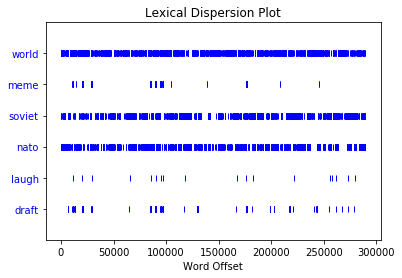

In [66]:
# dispersion plot for conspiracy captions

conspiracyText = nltk.Text(conspiracyText_tokens) # for first post

conspiracyText.dispersion_plot(['world','meme', 'soviet', 'nato', 'laugh', 'draft'])


In [67]:
#list for meme token analysis
memeText_tokens = []
for i in memeDF['normalized_tokens']:
    for x in i:
        memeText_tokens.append(x)

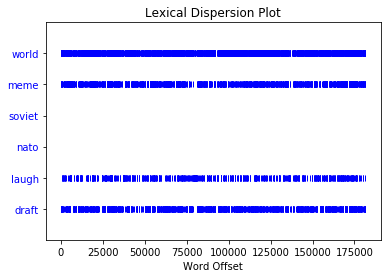

In [68]:
# dispersion plot for conspiracy captions

memeText = nltk.Text(memeText_tokens)

memeText.dispersion_plot(['world','meme', 'soviet', 'nato', 'laugh', 'draft'])

### tfidf plots

In [74]:
def plot_top_tfidf(series, data_description):
    # Apply 'get lemmas' function to any Pandas Series that we pass in to get lemmas for each row in the Series
    #lemmas = series.apply(get_lemmas)
    
    # Initialize Series of lemmas as Gensim Dictionary for further processing
    dictionary = corpora.Dictionary([i for i in series])

    # Convert dictionary into bag of words format: list of (token_id, token_count) tuples
    bow_corpus = [dictionary.doc2bow(text) for text in series]
    
    # Calculate TFIDF based on bag of words counts for each token and return weights:
    tfidf = models.TfidfModel(bow_corpus)
    tfidf_weights=[]
    
    for doc in tfidf[bow_corpus]:
        tfidf_weights.extend([[dictionary[ID], np.around(freq, decimals=2)] for ID, freq in doc])

    # Sort TFIDF weights highest to lowest:
    sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
    # Plot the top 10 weighted words:
    top_10 = {k:v for k,v in sorted_tfidf_weights[:10]} # dictionary comprehension
    plt.plot(list(top_10.keys()), list(top_10.values()))
    plt.xticks(rotation='vertical')
    plt.title('Top 10 Lemmas (TFIDF) for ' + data_description);
    
    return

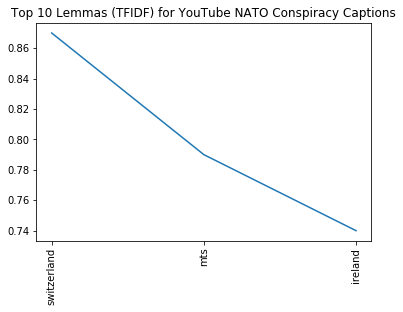

In [77]:
plot_top_tfidf(conDF['normalized_tokens'], 'YouTube NATO Conspiracy Captions')

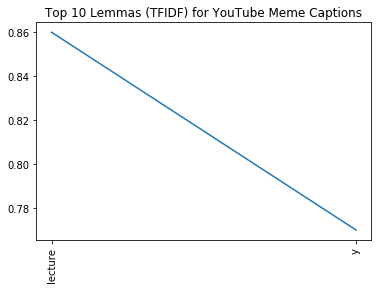

In [73]:
plot_top_tfidf(memeDF['normalized_tokens'], 'YouTube Meme Captions')

### Collocation

In [78]:
# Taking a come word like "World" let's compare the concordant matches
# conspiracy
conspiracyIndex = nltk.text.ConcordanceIndex(conspiracyText) 
conspiracyIndex.print_concordance('world')

Displaying 25 of 2470 matches:
exactly year world large military alliance form decade 
ry alliance form decade nato western world joint defense cold war enemy day lon
mbine nato member account lion share world military spending year nato good thi
ed states use nato expand power know world empire term passe protection interna
ission redundant year nato inception world change increasingly move multilatera
ional law think badly need want live world peaceful coexistence question leave 
eries illegal war united states need world multinational corporation privilege 
ational corporation privilege access world market product capital export course
roduct capital export course control world energy resource raw material war thr
rk times people die war 20th century world war start europe last year people mi
eople military personnel kill second world war last year casualty cause range b
re time episode amp quot infographic world war possible war come reason world w
c world war possible war come rea

In [79]:
# memes
memeIndex = nltk.text.ConcordanceIndex(memeText) 
memeIndex.print_concordance('world')

Displaying 25 of 4932 matches:
german soldier fight world war crossover mean wrong yeah crosso
 city colorize germany end get blame world war oh hope iranian soldier kt siege
sketball player find get draft draft world war nba yeah probably get draft nba 
 flapper art deco charleston fucking world war forget economic crash army range
t portable oven meme day people talk world war shit go real fucking quick team 
nically cheat government unlock skin world war guy stupid gon na look army guy 
guy stupid gon na look army guy find world war damn hope earth win little confu
nfused get spirit school teacher ask world war expert war politic pass read nig
e history book french people prepare world war world war propaganda play keep u
book french people prepare world war world war propaganda play keep use fit car
nda play keep use fit cartridge belt world war propaganda german soldier fight 
 war propaganda german soldier fight world war crossover mean wrong yeah crosso
sover episode army tillis

### Topic Modelling

In [80]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [83]:
def get_wordnet_pos(word):

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)
def get_lemmas(text):
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation)
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop]
    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in tokens]
    return lemmas

#### Conspiracy

In [179]:
# Lemmatize
con_lemmas = conDF['normalized_tokens']
#.apply(get_lemmas)

# Build bigram and trigram models after get_lemmas to see if there's anything relevant
con_bigram = models.Phrases(con_lemmas, min_count=5)

# export trained model to use less memory:
bigram_mod_con = models.phrases.Phraser(con_bigram)

In [180]:
# turning lemmas into bigrams
def make_bigrams(texts):
    return [bigram_mod_con[doc] for doc in texts]

# make bigrams
con_lemmas = make_bigrams(con_lemmas)

In [181]:
# Pre-processing
dictionary = corpora.Dictionary([i for i in con_lemmas])

# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
bow_corpus = [dictionary.doc2bow(text) for text in con_lemmas]

In [182]:
# Fit the model
con_ldamodel = models.ldamodel.LdaModel(bow_corpus, num_topics = 5, 
                                       id2word=dictionary, passes=20, 
                                       iterations=400)


In [183]:
# LDA Topic modelling
con_topics = con_ldamodel.print_topics(num_words=20)

# Printing topics in hip hop df
for conspiracy in con_topics:
    print(conspiracy)


(0, '0.010*"war" + 0.009*"military" + 0.009*"think" + 0.008*"world" + 0.008*"know" + 0.007*"soviet" + 0.007*"russia" + 0.007*"go" + 0.007*"like" + 0.006*"force" + 0.006*"nato" + 0.006*"say" + 0.006*"iran" + 0.006*"music" + 0.005*"country" + 0.005*"china" + 0.004*"people" + 0.004*"time" + 0.004*"amp_quot" + 0.004*"come"')
(1, '0.026*"nato" + 0.021*"soviet" + 0.015*"war" + 0.015*"attack" + 0.013*"force" + 0.013*"russia" + 0.010*"amp_quot" + 0.010*"air" + 0.010*"army" + 0.008*"warsaw_pact" + 0.007*"missile" + 0.007*"time" + 0.006*"military" + 0.006*"europe" + 0.006*"tank" + 0.006*"world" + 0.005*"russian" + 0.005*"american" + 0.004*"defense" + 0.004*"nuclear"')
(2, '0.014*"war" + 0.013*"yeah" + 0.010*"nato" + 0.010*"world" + 0.010*"air" + 0.010*"like" + 0.009*"know" + 0.009*"soviet" + 0.008*"plane" + 0.006*"mean" + 0.006*"m" + 0.006*"think" + 0.006*"missile" + 0.005*"go" + 0.005*"come" + 0.005*"get" + 0.005*"number" + 0.004*"time" + 0.004*"force" + 0.004*"start"')
(3, '0.025*"world" + 0.0

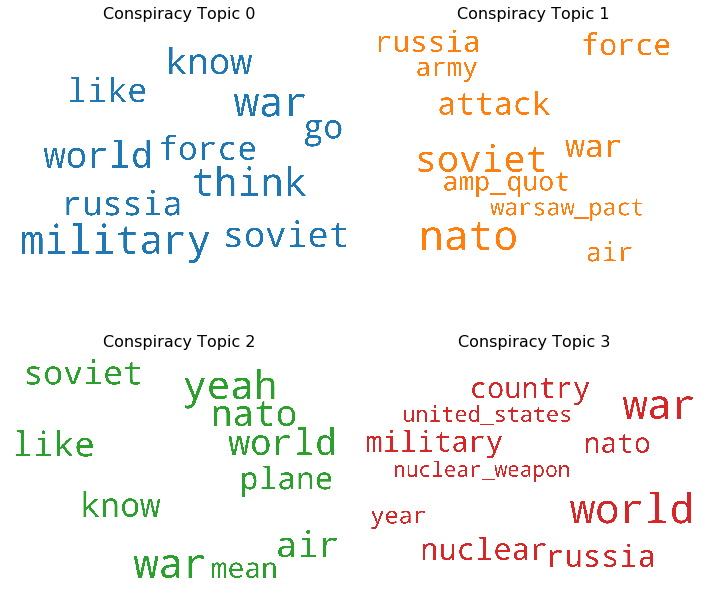

In [184]:

# 1. Wordcloud of Top N words in each topic
'''
Shout out to this page
https://www.machinelearningplus.com/nlp/
topic-modeling-visualization-how-to-present-results-lda-models/
'''
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = con_ldamodel.show_topics(formatted=False)


fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Conspiracy Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [185]:
def fill_topic_weights(df_row, bow_corpus):
    try:
        for i in con_ldamodel[bow_corpus[df_row.name]]:
            df_row[str(i[0])] = i[1]
    except:
        return df_row
    return df_row

In [186]:
conDF = conDF.apply(fill_topic_weights, axis=1, args=[bow_corpus]).fillna(0)

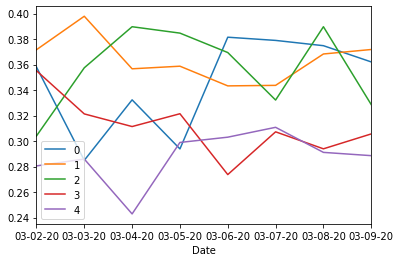

In [187]:
#plot
conDF[['0','1','2','3','4','Date']].groupby('Date').mean().plot()


#### Meme Topics

In [188]:
#lemmas and bigrams
# Captions to normalized 
meme_lemmas = memeDF['normalized_tokens']
#.apply(get_lemmas)

meme_bigram = models.Phrases(meme_lemmas, min_count=5)

bigram_mod_meme = models.phrases.Phraser(meme_bigram)


In [189]:
def make_bigrams(texts):
    return [bigram_mod_meme[doc] for doc in texts]

meme_lemmas = make_bigrams(meme_lemmas)

In [228]:
#create dict
dictionary_meme = corpora.Dictionary([i for i in meme_lemmas])

# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
bow_corpus_meme = [dictionary_meme.doc2bow(text) for text in meme_lemmas]

# Fit the model
meme_ldamodel = models.ldamodel.LdaModel(bow_corpus_meme, num_topics = 5, 
                                       id2word=dictionary_meme, passes=20, 
                                       iterations=400)
# LDA Topic modelling
meme_topics = meme_ldamodel.print_topics(num_words=20)

# Printing topics in hip hop df
for topic in meme_topics:
    print(topic)

(0, '0.067*"war" + 0.056*"world" + 0.023*"iran" + 0.016*"draft" + 0.015*"get" + 0.012*"like" + 0.012*"start" + 0.012*"m" + 0.012*"meme" + 0.009*"oh" + 0.008*"people" + 0.008*"know" + 0.007*"come" + 0.007*"player" + 0.007*"music" + 0.007*"guy" + 0.006*"boy" + 0.005*"time" + 0.005*"play" + 0.005*"happen"')
(1, '0.037*"like" + 0.025*"know" + 0.019*"m" + 0.018*"war" + 0.014*"oh" + 0.014*"world" + 0.014*"gon_na" + 0.013*"music" + 0.012*"go" + 0.012*"yeah" + 0.011*"meme" + 0.011*"think" + 0.010*"get" + 0.009*"people" + 0.009*"guy" + 0.008*"right" + 0.008*"mean" + 0.008*"say" + 0.008*"video" + 0.008*"funny"')
(2, '0.049*"amp_gt" + 0.040*"amp_quot" + 0.020*"lt_gt" + 0.016*"world" + 0.016*"good" + 0.016*"/i_gt" + 0.014*"m" + 0.013*"laughter_lt" + 0.012*"iran" + 0.011*"gt_amp" + 0.011*"gt" + 0.011*"jon" + 0.009*"know" + 0.007*"trump" + 0.007*"war" + 0.007*"thing" + 0.007*"like" + 0.007*"applause" + 0.007*"lt_/i" + 0.007*"appear_stand"')
(3, '0.027*"m" + 0.022*"oh" + 0.021*"like" + 0.018*"guy" + 

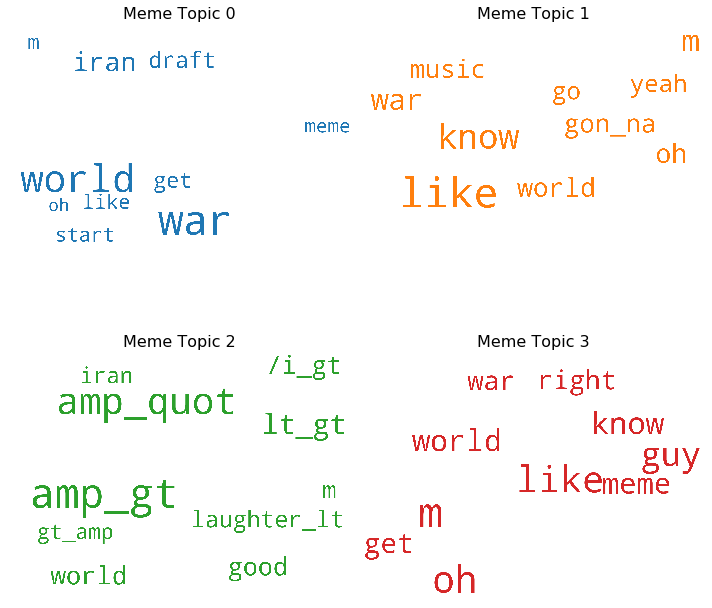

In [229]:
topics = meme_ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Meme Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [230]:
#fill topic weights by videos
def fill_topic_weights(df_row, bow_corpus):
    try:
        for i in meme_ldamodel[bow_corpus[df_row.name]]:
            df_row[str(i[0])] = i[1]
    except:
        return df_row
    return df_row


In [231]:
memeDF = memeDF.apply(fill_topic_weights, axis=1, args=[bow_corpus_meme]).fillna(0)


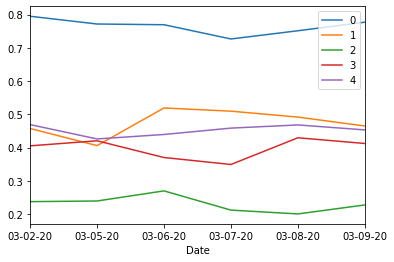

In [232]:
#plot
memeDF[['0','1','2','3','4','Date']].groupby('Date').mean().plot()


#### Topic Visualizations per dataset

In [233]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(meme_ldamodel, bow_corpus_meme, dictionary=meme_ldamodel.id2word)
vis


/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.016017  0.141758       1        1  47.926949
1      0.073029  0.007408       2        1  34.226402
3      0.104236  0.084340       3        1  10.704066
4      0.073908 -0.216927       4        1   5.371405
2     -0.267190 -0.016579       5        1   1.771173, topic_info=     Category         Freq      Term        Total  loglift  logprob
99    Default  2207.000000     music  2207.000000  30.0000  30.0000
91    Default  2416.000000         m  2416.000000  29.0000  29.0000
167   Default  4798.000000     world  4798.000000  28.0000  28.0000
1682  Default   453.000000  amp_quot   453.000000  27.0000  27.0000
76    Default  1728.000000      iran  1728.000000  26.0000  26.0000
...       ...          ...       ...          ...      ...      ...
97     Topic5    11.571774      meme  1532.423096  -0.8525  -5.3835
445    Topic5    11.298416       yes   137.560135   1.5341  -5.4075
93     Topic5    11.298356       man   737.202087  -0.1447  -5.4075
672    Topic5    11.297735      work   176.611801   1.2842  -5.4075
1463   Topic5    11.295980     happy   109.420715   1.7628  -5.4077

[385 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
448       1  0.003285       -PRON-
448       2  0.945939       -PRON-
448       3  0.049268       -PRON-
3799      5  0.976340        /i_gt
3802      5  0.926895      achieve
...     ...       ...          ...
3232      1  0.018625        yo_yo
3232      2  0.074502        yo_yo
3232      4  0.894020        yo_yo
3233      2  0.124164  zombie_shit
3233      4  0.869146  zombie_shit

[580 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])

In [196]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(con_ldamodel, bow_corpus, dictionary=con_ldamodel.id2word)
vis


/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.071195 -0.055341       1        1  32.095478
2     -0.168584  0.059915       2        1  19.762737
4      0.027713  0.083783       3        1  17.330107
3      0.060279 -0.188515       4        1  16.109797
1      0.151787  0.100157       5        1  14.701880, topic_info=    Category         Freq           Term        Total  loglift  logprob
794  Default   754.000000           yeah   754.000000  30.0000  30.0000
238  Default  2124.000000         soviet  2124.000000  29.0000  29.0000
179  Default  2557.000000           nato  2557.000000  28.0000  28.0000
298  Default   620.000000       amp_quot   620.000000  27.0000  27.0000
286  Default  2292.000000          world  2292.000000  26.0000  26.0000
..       ...          ...            ...          ...      ...      ...
286   Topic5   180.743057          world  2292.930664  -0.6233  -5.1659
253   Topic5    90.347099           take   391.091461   0.4519  -5.8593
183   Topic5    96.511009            new   519.676575   0.2336  -5.7933
482   Topic5    93.626205          start   504.171204   0.2336  -5.8237
270   Topic5    95.002518  united_states   714.745117  -0.1008  -5.8091

[420 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2782      1  0.859781            $
2782      3  0.135755            $
7375      5  0.944712  able_archer
2476      2  0.840005   accentuate
2476      3  0.135485   accentuate
...     ...       ...          ...
2407      1  0.318414          yes
2407      2  0.534481          yes
2407      3  0.045488          yes
2407      4  0.102347          yes
3853      5  0.950109        zapad

[795 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

#### Topic Modelling Word Sets

#### Dataset Comparisons

In [106]:
conWords = set(conDF['normalized_tokens'].sum())
memeWords = set(memeDF['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = conWords & memeWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}


In [107]:
overlapWordsDict['war']

1331

In [108]:
overlapWordsDict['draft']

782

In [109]:
overlapWordsDict['russia']

391

In [118]:
# Nato had no overlap
overlapWordsDict['military']

598

In [111]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()


In [112]:
#make the arrays
#token divergence, looking at overlapping words, then calculate entropy
conProbArray = makeProbsArray(conDF['normalized_tokens'], overlapWordsDict)
memeProbArray = makeProbsArray(memeDF['normalized_tokens'], overlapWordsDict)

In [142]:
from scipy.stats import entropy

In [144]:
con_memeDivergence = entropy(conProbArray, memeProbArray)
print (con_memeDivergence)
meme_conDivergence = entropy(memeProbArray, conProbArray)
print (meme_conDivergence)

0.868340599112764
0.7325050665311716


In [ ]:
#Treat them as sets, 
#identify and weight them
#overlaps up to a certain percentage. 


In [ ]:
# Diveregence

#### Topic Model Correlation via set theory

In [234]:
def plot_difference_plotly(mdiff, title="", annotation=None):
    """Plot the difference between models.

    Uses plotly as the backend."""
    import plotly.graph_objs as go
    import plotly.offline as py

    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))


def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)


try:
    get_ipython()
    import plotly.offline as py
except Exception:
    #
    # Fall back to matplotlib if we're not in a notebook, or if plotly is
    # unavailable for whatever reason.
    #
    plot_difference = plot_difference_matplotlib
else:
    py.init_notebook_mode()
    plot_difference = plot_difference_plotly

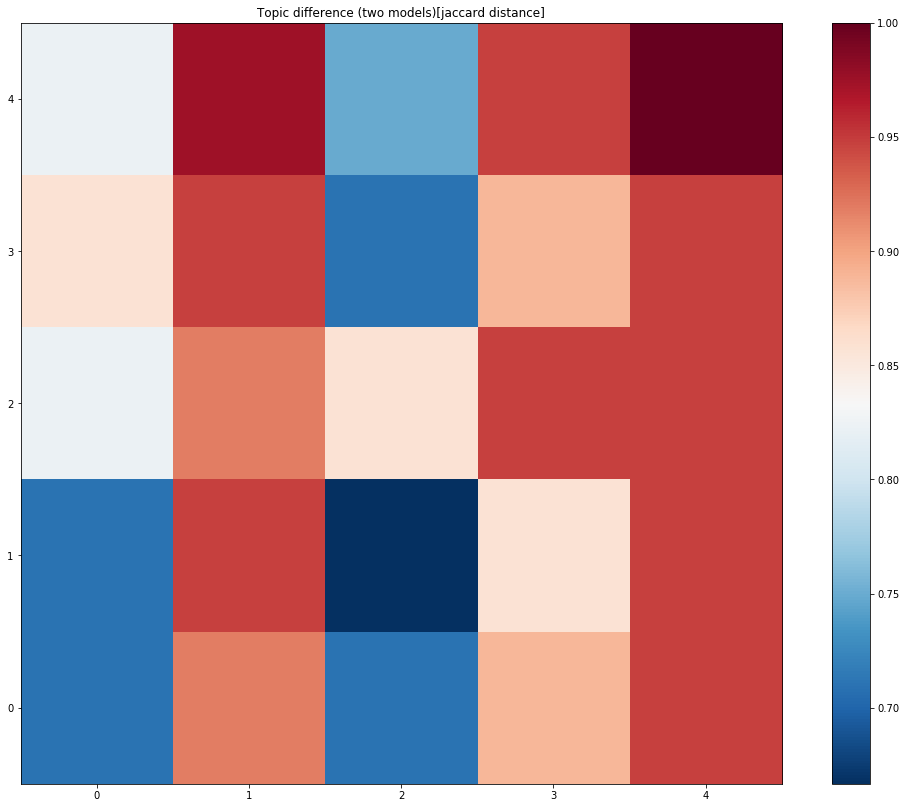

In [239]:
import numpy as np
mdiff, annotation = meme_ldamodel.diff(con_ldamodel, distance='jaccard', num_words=20)
plot_difference(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)

# Image collection

In [ ]:
#https://medium.com/better-programming/scraping-memes-from-reddit-55842273b3e1

# Image processing


In [1]:
import cv2 
import pytesseract
from PIL import Image

In [2]:

'''
Shout out to https://nanonets.com/blog/ocr-with-tesseract/
'''
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [284]:
#list of images
images = ['11-war-without2.jpg','10-area-51.jpg',
          '09-poland.jpg', '07-siri.jpg','08-trending.jpg',
          '06-iran-carpet.jpg','04-war-without.jpg','05-justwoke.jpg',
          '03-respawn.jpg','02-iran-pres.jpg','01-sunny.jpg']


imageDF = pd.DataFrame(images, columns = ['image'])
imageDF['text'] = 0
imageDF.head()

image  text
0  11-war-without2.jpg     0
1       10-area-51.jpg     0
2        09-poland.jpg     0
3          07-siri.jpg     0
4      08-trending.jpg     0

****


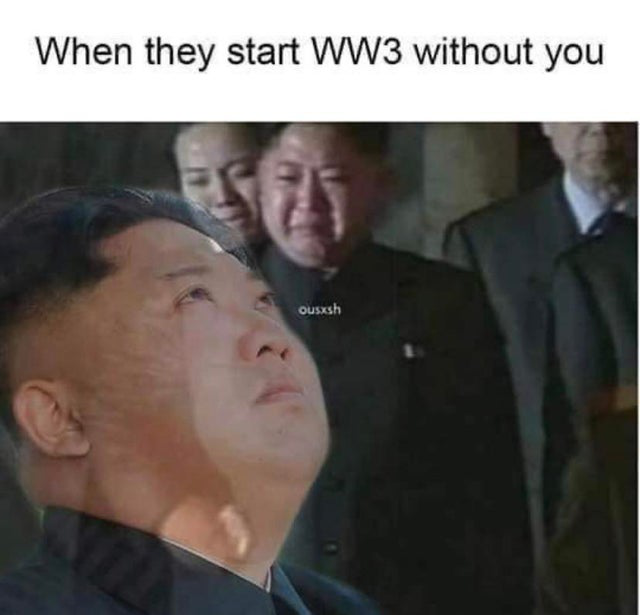

image file: 11-war-without2.jpg
When they start WW3 without you
=. -
Alf. y
S J
A i


****


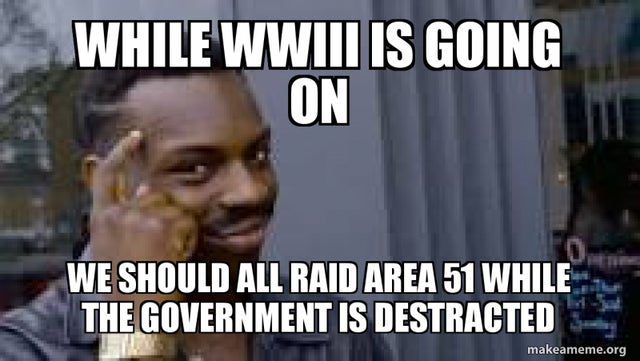

image file: 10-area-51.jpg
WHILE WWIII IS GOING
nL
dal
=’
_WE SHOULD ALL RAID AREA 51 WHILE
© THEGOVERNMENT IS DESTRACTED


****


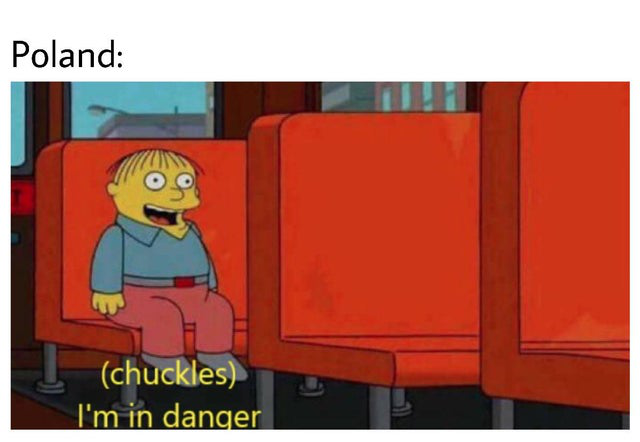

image file: 09-poland.jpg
Poland:
ae fl i [} a
oro
Le,
a


****


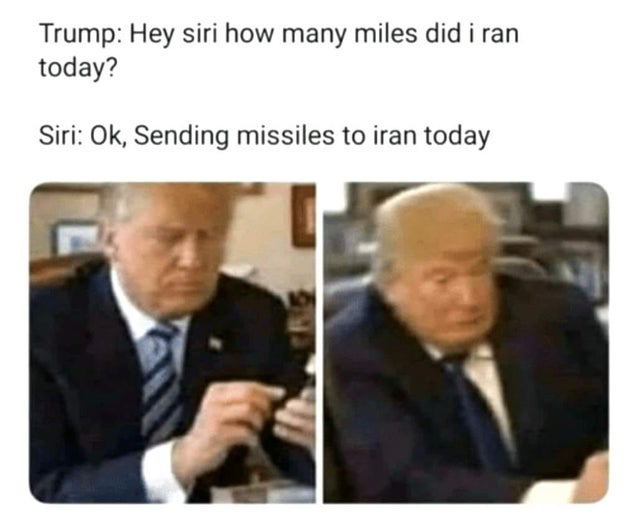

image file: 07-siri.jpg
Trump: Hey siri how many miles did i ran
today?
Siri: Ok, Sending missiles to iran today
; -
; . aa


****


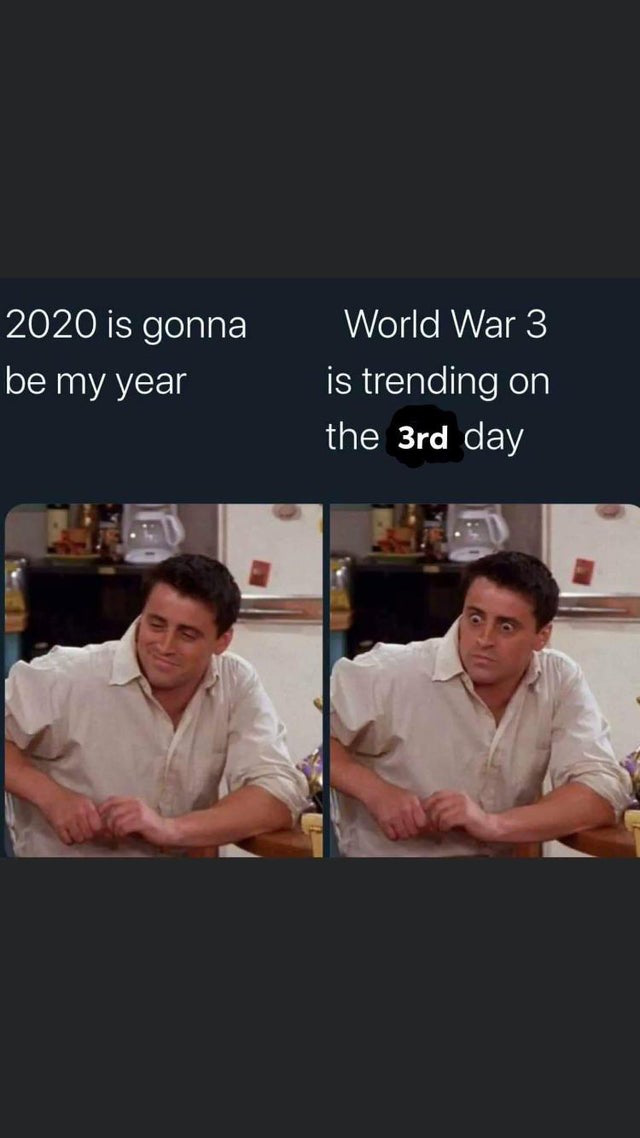

image file: 08-trending.jpg
2020 is gonna World War 3
be my year is trending on
the 3rd day
aoe | (ee
w= |:
VW.
) ; > , =.


****


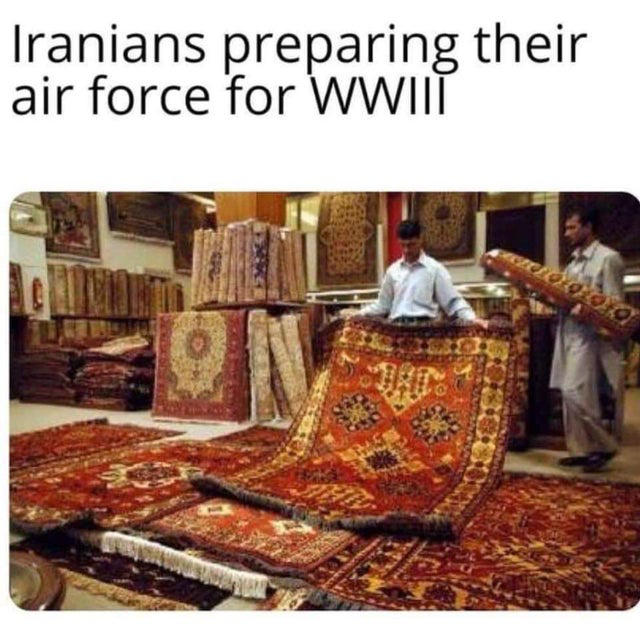

image file: 06-iran-carpet.jpg
lranians preparing their

air force for WWIII

~ Bee vt wT | & +4
yi. ee) ae m-

_—! es)


****


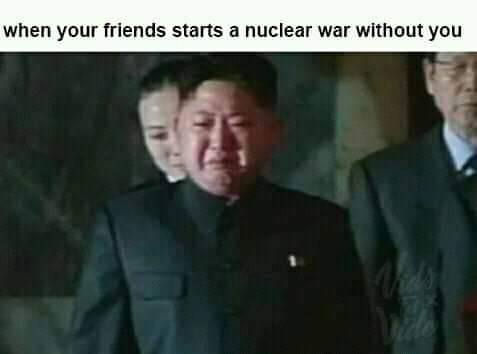

image file: 04-war-without.jpg
when your friends starts a nuclear war without you
a
.
‘ C
'


****


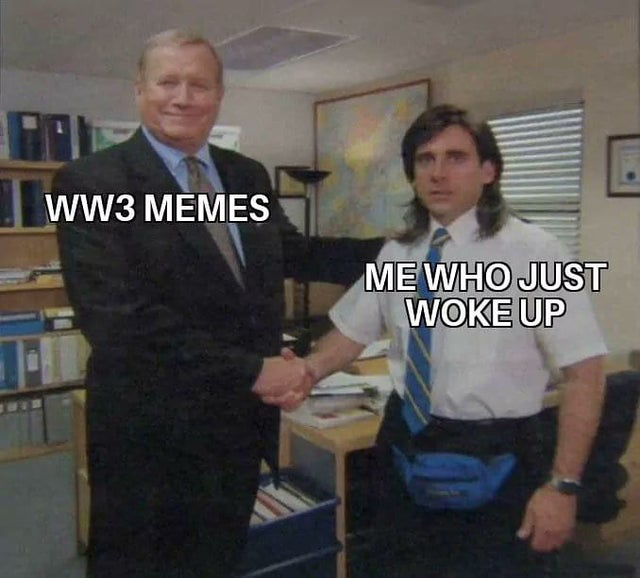

image file: 05-justwoke.jpg
a
Peis . + © = E
x | - Heat

= @ ‘oe UP
LD om il
iy = ,


****


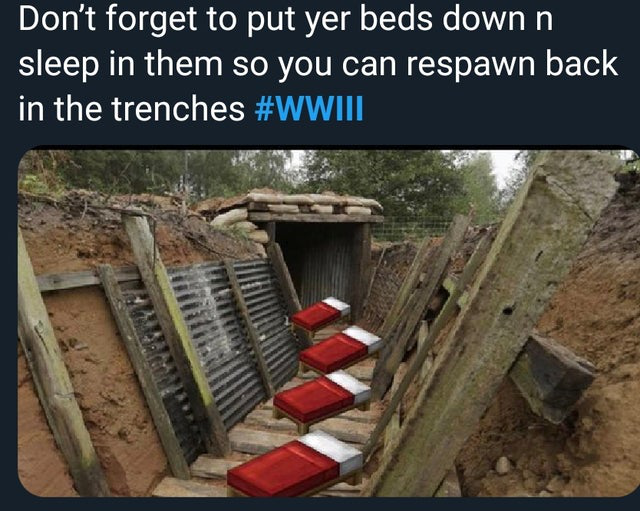

image file: 03-respawn.jpg
Don't forget to put yer beds down n
sleep in them so you can respawn back
in the trenches #WWIII
ce ae 2 - Say
a NSS
i Zs


****


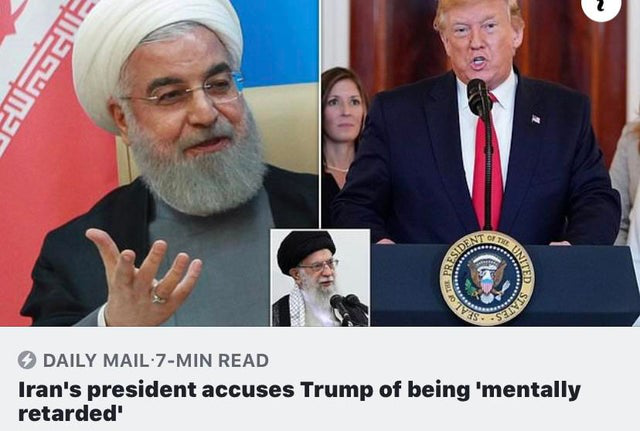

image file: 02-iran-pres.jpg
f _
vo, sie 4
CB i a
y , a" Bas
} i on * }
?
a a Gm — |
ly 4 , bi ee
Te io
DAILY MAIL-7-MIN READ
Iran's president accuses Trump of being 'mentally
retarded’


****


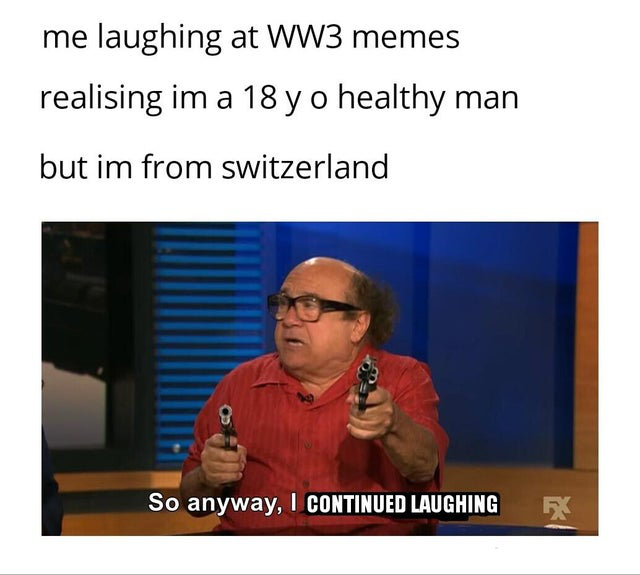

image file: 01-sunny.jpg
me laughing at WW3 memes
realising im a 18 y 0 healthy man
but im from switzerland
=
t “|
"i LIE
ype Hl
eel “om
Yo) anyway; TOUTE UTT TT T 6




In [285]:
#looping through images to get OCR output
texts = []


for image in images:

    print("****")
    imgur = Image.open('./Images/'+ image)

    display(imgur)

    img = cv2.imread('./Images/'+ image)
    #remove_noise(img)

    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(img, config=custom_config)

    texts.append(text)

    print('image file: {}'.format(image))
    print(text)

    print("")
    print("")

        


In [286]:
imageDF['text'] = pd.DataFrame(texts)

        

In [287]:
imageDF.head()

image                                               text
0  11-war-without2.jpg  When they start WW3 without you\n=. -\nAlf. y\...
1       10-area-51.jpg  WHILE WWIII IS GOING\nnL\ndal\n=’\n_WE SHOULD ...
2        09-poland.jpg                 Poland:\nae fl i [} a\noro\nLe,\na
3          07-siri.jpg  Trump: Hey siri how many miles did i ran\ntoda...
4      08-trending.jpg  2020 is gonna World War 3\nbe my year is trend...

In [288]:
imageDF['tokenized_text'] = imageDF['text'].apply(lambda x: word_tokenize(str(x)))

In [293]:
imageDF['normalized_tokens'] = imageDF['tokenized_text'].apply(lambda x: normalizeTokens(x))


In [ ]:
imageDF['tokenized_text'][1] 
